(5)=
# Chapter 5: Pandas

In [ ]:
%config InlineBackend.figure_format = 'svg'

While NumPy is the foundation of much of the SciPy ecosystem and provides very capable ndarray objects, it has a few shortcomings. The first is that NumPy arrays cannot hold different types of objects in a single array. For example, if we attempt to convert the following list containing integers, floats, and strings into an array, NumPy coverts all elements into strings as a way of making the object types uniform.

In [2]:
nums = [1, 2, 3, 'four', 5, 'six', 7.0]

In [3]:
import numpy as np
np.array(nums)

array(['1', '2', '3', 'four', '5', 'six', '7.0'], dtype='<U32')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The second shortcoming is that NumPy arrays do not support labels in the data. That is, columns cannot have labels describing what they contain like you might see in a well constructed spreadsheet. This burdens the user to keep track of which column contains what information. Finally, while NumPy contains a wealth of basic tools for working with data, there are still many operations that it does not support like grouping data based on the value of a particular column or the ability to merge two data sets with automatic alignment of analogous data.

A data scientist named Wes McKinney created the pandas library which provides a wealth of additional tools for working with data, and possibly the most endearing feature, the ability to call data based on labels. Data columns and rows can contain human-readable labels that are used to access the data. Pandas still supports accessing data using indices if the user wishes to go that route, but the user can now access data without knowing which column it is in as long as the user knows the column label.
    
By popular convention, the pandas library is imported with the `pd alias`, which is used here. This chapter also assumes the following imports.

(5.1)=
## 5.1 Basic Pandas Objects

To support the wealth of features, pandas uses its own objects to hold data called a Series and a DataFrame, which are built on NumPy arrays. Because they are built on NumPy, many of the NumPy functions (e.g., `np.mean()`) work on pandas objects. The key difference between the a Series and DataFrame is that a Series is one-dimensional while a DataFrame is two-dimensional. Unlike a NumPy array, pandas objects have fixed dimensionality. There is a three-dimensional object called a *Panel*, but this will not be covered here as it is not often used.

(5.1.1)=
### 5.1.1 Series

While the pandas *Series* is restricted to being a single dimension, it can be as long as necessary to hold the data. A Series containing the atomic masses of the first five elements on the periodic table is generated below using the `pd.Series()` function. This function is always capitalized.

In [5]:
mass = pd.Series([1.01,4.00,6.94,9.01,10.81])
mass

0     1.01
1     4.00
2     6.94
3     9.01
4    10.81
dtype: float64

The right column is the actual data in the Series while the values on the left are the assigned indices for each value in the Series. The index column is not part of the dimensionality of the Series; it is metadata (i.e., data about the data). 

Consistent with list, tuples, and ndarrays, values in a Series can be accessed using indexing with square brackets as demonstrated below.

In [6]:
mass[2]

6.94

Unlike other multi-element objects seen so far, data in a Series can be accessed using indices different from the default (i.e., 0, 1, 2, etc…) values. That is, custom indices can be assigned using the index argument shown below.

In [7]:
index=('H', 'He', 'Li', 'Be', 'B')
mass2 = pd.Series([1.01,4.00,6.94,9.01,10.81], index)
mass2

H      1.01
He     4.00
Li     6.94
Be     9.01
B     10.81
dtype: float64

The custom indices can now be used to access an element in a Series. This makes a Series behave something like a dictionary ([section 2.2](2.2)).

In [8]:
mass2['He']

4.0

The indices can be accessed by using `mass2.index`. Series indices can also be modified after a Series has been created by using `.index` and assignment as demonstrated below.

In [9]:
mass.index =['H', 'He', 'Li', 'Be', 'B']
mass

H      1.01
He     4.00
Li     6.94
Be     9.01
B     10.81
dtype: float64

Even if we create or modify a Series to have custom indices, we can still access the elements using the traditional numerical indices using the `iloc[]` method. This method allows the user to access elements the same way as in a NumPy array regardless of assigned index values.

In [10]:
mass2.iloc[2]

6.94

(5.1.2)=
### 5.1.2 DataFrame

Most data you will find yourself working with will be best placed in a two-dimensional pandas object called a *DataFrame* which is always written with two capital letters. The DataFrame is similar to a Series except that now there are also columns with names. The columns can be accessed by column names and rows can be accesses by indices. You might think of a DataFrame as a collection of Series objects. Below, a DataFrame is constructed to hold the names, atomic numbers, masses, and ionization energies of the first five elements.

In [11]:
name = ['hydrogen', 'helium', 'lithium', 'beryllium','boron']
AN = [1,2,3,4,5]
mass = [1.01,4.00,6.94,9.01,10.81]
IE = [13.6, 24.6, 5.4, 9.3, 8.3]

In [12]:
columns = ['H', 'He', 'Li', 'Be','B'] 
index = ['name', 'AN', 'mass', 'IE']
elements = pd.DataFrame([name, AN, mass, IE], 
                        columns=columns, index=index)
elements

,H,He,Li,Be,B
name,hydrogen,helium,lithium,beryllium,boron
AN,1,2,3,4,5
mass,1.01,4.0,6.94,9.01,10.81
IE,13.6,24.6,5.4,9.3,8.3


To access data in a DataFrame, place the column name in square brackets.

In [13]:
elements['Li']

name    lithium
AN            3
mass       6.94
IE          5.4
Name: Li, dtype: object

Essentially what we get out of a column is a Series with the indices shown on the lefthand side.

To indicate a row, instead use the `loc[]` method. We again get a Series with indices derived from the column names in the source DataFrame. This Series can be placed in a variable and indexed just like in section [5.1.1](5.1.1).

In [14]:
elements.loc['IE']

H     13.6
He    24.6
Li     5.4
Be     9.3
B      8.3
Name: IE, dtype: object

In [15]:
atomic_number = elements.loc['AN']

In [16]:
atomic_number['B']

5

Alternatively, we can use the DataFrame directly and index it with the `loc[]` method as `[row, column]`.

In [17]:
elements.loc['IE', 'Li']

5.4

Numerical index values can also be used with the `iloc[]` method. This reduces indexing to how NumPy arrays are indexed.

In [18]:
elements.iloc[2:, 2]

mass    6.94
IE       5.4
Name: Li, dtype: object

A summary of the methods of indexing pandas Series and DataFrames is presented below in Table 1.

**Table 1** Summary of Pandas Indexing

| Index Method | Description |
|:-----------: | :---------  |
|`s[index]` | Index Series with assigned index values
|`s.iloc[index]` | Index Series with default numerical index values |
|`df[column]` | Index DataFrame with column name|
|`df.loc[row]` | Index DataFrame with row name|
|`df.loc[row, column]` | Index DataFrame with row and column names|
|`df.iloc[row, column]` | Index DataFrame with row and column default numerical index values|


(5.2)=
## 5.2 Reading/Writing Data

Similar to NumPy, pandas contains multiple, convenient functions for reading/writing data directly to and from its own object types, and each function is suited to a specific file format. This includes CSV, HTML, JSON, SQL, Excel, and HDF5 files [among others](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

**Table 2** Import/Export Functions in Pandas

| Function | Description |
|:-------: | :---------  |
|`read_csv()` and `to_csv()` | Imports/Exports data from/to a CSV file |
|`read_table()` and `to_table()` | General-purpose importer/exporter |
|`read_hdf5()` and `to_hdf5()` | Imports/Exports data from/to an HDF5 file |
|`read_clipboard()` and `to_clipboard()` | Transfers data to/from the clipboard\* to a Series or DataFrame |
|`read_excel()` and `to_excel()` | Reads/writes an Excel file|

(5.2.1)=
### 5.2.1 General-Purpose Delimited File Reader

Before we start with more well-defined file formats, pandas provides a general purpose file reader `pd.read_table()`. This function imports text files where lines represent rows and the data in each row is separated by characters or spaces. The user can designate what character(s) separate the data by using the `delimiter` or `sep` arguments (they do the same thing),  or as an easy way of breaking up data based on spaces, set the  `delim_whitespaces` equal to `True`. The function also includes a series of other arguments listed below in Table 3.

**Table 3** More `pd.read_table()` Arguments

| Argument | Description |
|:--------:| :-------    |
|`delimiter`| Data separator; default is tab|
|`sep` | Data separator; default is tab|
|`skiprows` | Number of rows in file to skip before reading data|
|`skipfooter` | Number of rows at the bottom of the file to skip|
|`skip_blank_lines`| If `True`, skips blank lines in file; default is `False`|
|`header` | Row number to use for a data header; also accepts None if no header is provided in the file|
|`delim_whitespace` | Boolean argument indicating that data is separated by white space; default is `False`|
|`skipinitialspace` | If `True`, skips white space after delimiter|

As an example, we can use this function to read a calculated PDB file of benzene and extract the $xyz$ coordinates for each atom. This particular file type, shown below, is [strictly formatted based on the position in a line](http://www.wwpdb.org/documentation/file-format), but being that all the data columns here have spaces between them, we can use space delimitation by setting  `delim_whitespace=True`. Because the data do not start until the third line and we do not need the last thirteen lines of the file, we should exclude these rows. We set `header=None` because we do not want the function to treat the first line of data as a header or data label.

    HEADER 
    REMARK 
    HETATM    1  H   UNK  0001       0.000   0.000  -0.020 
    HETATM    2  C   UNK  0001       0.000   0.000   1.067 
    HETATM    3  C   UNK  0001       0.000   0.000   3.857 
    HETATM    4  C   UNK  0001       0.000  -1.208   1.764 
    HETATM    5  C   UNK  0001       0.000   1.208   1.764 
    HETATM    6  C   UNK  0001       0.000   1.208   3.159 
    HETATM    7  C   UNK  0001       0.000  -1.208   3.159 
    HETATM    8  H   UNK  0001       0.000  -2.149   1.221 
    HETATM    9  H   UNK  0001       0.000   2.149   1.221 
    HETATM   10  H   UNK  0001       0.000   2.149   3.703 
    HETATM   11  H   UNK  0001       0.000  -2.149   3.703 
    HETATM   12  H   UNK  0001       0.000   0.000   4.943 
    CONECT    1    2 
    CONECT    2    1    5    4 
    CONECT    3    6    7   12 
    CONECT    4    7    2    8 
    CONECT    5    2    6    9 
    CONECT    6    5    3   10 
    CONECT    7    3    4   11 
    CONECT    8    4 
    CONECT    9    5 
    CONECT   10    6 
    CONECT   11    7 
    CONECT   12    3 
    END

In [19]:
benz = pd.read_table('data/benzene.pdb', delim_whitespace=True, 
                     skiprows=2, skipfooter=13, header=None, 
                     engine='python')

In [20]:
benz

,0,1,2,3,4,5,6,7
0,HETATM,1,H,UNK,1,0.0,0.000,-0.020
1,HETATM,2,C,UNK,1,0.0,0.000,1.067
2,HETATM,3,C,UNK,1,0.0,0.000,3.857
3,HETATM,4,C,UNK,1,0.0,-1.208,1.764
4,HETATM,5,C,UNK,1,0.0,1.208,1.764
5,HETATM,6,C,UNK,1,0.0,1.208,3.159
6,HETATM,7,C,UNK,1,0.0,-1.208,3.159
7,HETATM,8,H,UNK,1,0.0,-2.149,1.221
8,HETATM,9,H,UNK,1,0.0,2.149,1.221
9,HETATM,10,H,UNK,1,0.0,2.149,3.703


 The $x$, $y$, and $z$ data are in columns 5, 6, and 7, respectively and can be extracted by indexing as discussed in [section 5.1.2](5.1.2).

(5.2.2)=
### 5.2.2 Comma Separated Values Files

Pandas provides a collection of more format-specific functions for reading/writing files. The most popular is possibly the CSV file because it is simple and many scientific instruments support exporting data in this format. To import a CSV file, we will use the `read_csv()` function. This function is very similar to the `read_table()` function except that a default value for the separator/delimiter is set to a comma. To create a CSV file, use the `to_csv()` method which at a minimum requires the file name and a pandas object with the data.

We can write the above chemical element data assembled in [section 5.1](5.1) as shown below. Because we are starting from a pandas object and are using a pandas method, the `df.to_csv()` format is used where df is a DataFrame.

~~~python
elements.to_csv('elements.csv')
~~~

If we check the directory containing the Jupyter notebook, the data folder contains a file titled *elements.csv* that looks like the following. Each row in the DataFrame is a different line in the file, and every column is separated by a comma.

    ,H,He,Li,Be,B
    name,hydrogen,helium,lithium,berylium,boron
    AN,1,2,3,4,5
    mass,1.01,4.0,6.94,9.01,10.81
    IE,13.6,24.6,5.4,9.3,8.3

To read the data back in from the file, use `pd.read_csv()`. Because we are not starting with a pandas object, the function is called using the `pd.function()` format.

In [21]:
pd.read_csv('data/elements.csv')

,Unnamed: 0,H,He,Li,Be,B
0,name,hydrogen,helium,lithium,beryllium,boron
1,AN,1,2,3,4,5
2,mass,1.01,4.0,6.94,9.01,10.81
3,IE,13.6,24.6,5.4,9.3,8.3


(5.2.3)=
### 5.2.3 Excel Notebook Files

Pandas provides another useful function for importing Excel notebook files (i.e., *.xls* or *.xlsx*). Because Excel files can contain multiple sheets, this function is a little more complicated to use. The simplest way to import an Excel file is to use `pd.read_excel()` and provide it with the Excel file name.

In [22]:
pd.read_excel('data/test.xls')

,x,y
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36
6,7,49


In the above example, pandas assumes the first sheet in the file. If you want to access a different sheet in the file, you can specify this by using the `sheet_name` keyword argument. If you do not know the sheet name, the `sheet_name` argument also accepts integer index values (i.e., `0` for the first sheet and so on).

In [23]:
data = pd.read_excel('data/test.xls', sheet_name='Sheet2')
data

,a,b,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,b.1
0,1,0.841471,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.909297,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.141120,NaN,NaN,NaN,NaN,NaN,NaN
3,4,-0.756802,NaN,NaN,NaN,NaN,NaN,NaN
4,5,-0.958924,NaN,NaN,NaN,NaN,NaN,NaN
5,6,-0.279415,NaN,NaN,NaN,NaN,NaN,NaN
6,7,0.656987,NaN,NaN,NaN,NaN,NaN,NaN
7,8,0.989358,NaN,NaN,NaN,NaN,NaN,NaN
8,9,0.412118,NaN,NaN,NaN,NaN,NaN,NaN


Alternatively, if you want to extract the sheet names, you can use the `sheets_names` method with the `ExcelFile` class as demonstrated below.

In [24]:
xl = pd.ExcelFile('data/test.xls')
xl.sheet_names

['Sheet1', 'Sheet2']

Writing to an Excel file requires two steps – generate an ExcelWriter engine and then write each sheet. The Excel writer offers more power in generating Excel files including embedding charts, conditional formatting, coloring cells, and other tasks; but we will stick to the basics here.

In [25]:
writer = pd.ExcelWriter('new_file.xlsx')
data.to_excel(writer, 'First Sheet')
writer.save()

(5.2.4)=
### 5.2.4 Computer Clipboard

Pandas will also accept data from the computer’s copy and paste clipboard. Start by highlighting some data from a webpage or a spreadsheet, select copy. This is typically located under the Edit menu of most software applications. Alternatively, you can type Command + C on a macOS or Control + C on Windows and Linux. Finally, use the `pd.read_clipboard()` function to convert it to a pandas DataFrame.

~~~python
pd.read_clipboard()
~~~

Loading data from the clipboard is not a robust and efficient way to do much of your automated data analysis, but it is a very convenient method to experiment with data or to quickly grab some data off a website to experiment with.

(5.3)=
## 5.3 Examining Data with Pandas

Once you load data into pandas, you will likely want to get an idea of what the data look like before you proceed to calculations and in-depth analyses. This section covers a few methods provided in pandas to gain a preliminary understanding of your data.

(5.3.1)=
### 5.3.1 Descriptive Functions

Pandas provides a few simple functions to view and describe new data. The first two are `head()` and `tail()` which allow you to see the top and bottom of the DataFrame, respectively. These are particularly useful when dealing with very large DataFrames. Below, a DataFrame containing random values in an even, normal, and poisson distribution ($\lambda$ = 3.0) demonstrates these functions.

In [26]:
random = pd.DataFrame({'even': np.random.rand(1000),
                       'normal': np.random.randn(1000),
                       'poisson': np.random.poisson(
                        lam=3.0, size=1000)})

In [27]:
random.head()

,even,normal,poisson
0,0.829656,2.067408,6
1,0.755386,-0.886657,4
2,0.869834,1.869823,1
3,0.454649,1.272317,2
4,0.867654,-0.372968,2


In [28]:
random.tail()

,even,normal,poisson
995,0.217875,0.069063,6
996,0.328767,0.248830,2
997,0.564017,-0.662266,1
998,0.883884,-0.706406,2
999,0.008852,-0.157862,3


Pandas also contains a `describe()` function that returns a variety of statistics on each column. For example, the mean is provided which are approximately 0.5, 0.0, and 3.0 for the even, normal, and poisson distributions, respectively. This is not surprising being that the even distribution is centered around 0.5, the normal around 0.0, and the poisson distribution is generated for an average of 3.0. The user is also provided with the minimum, maximum, standard deviation, and the quartile boundaries.

In [29]:
random.describe()

,even,normal,poisson
count,1000.000000,1000.000000,1000.000000
mean,0.518862,-0.059525,3.046000
std,0.294217,1.009306,1.781308
min,0.000078,-3.534098,0.000000
25%,0.261331,-0.750191,2.000000
50%,0.520746,-0.126962,3.000000
75%,0.775332,0.599610,4.000000
max,0.999943,4.085618,13.000000


Another useful function is the `value_counts()` method which returns all unique values in a Series (or DataFrame column or row). Below, it is demonstrated on the poisson column being that the other two columns will have a relatively large number of unique values.

In [30]:
counts = random['poisson'].value_counts()
counts

2     228
3     228
4     155
1     145
5     106
6      51
0      47
7      24
8      11
9       4
13      1
Name: poisson, dtype: int64

Data in DataFrames can be plotting by calling the desired columns of data and feeding them into plotting functions like `plt.scatter()`. The data can also be visualized by using the `df.plot(kind=)` format where `df` is the DataFrame and `kind` is the plot type (e.g., `'bar'`, `'hist'`, `'scatter'`, `'line'`, `'pie'`, etc...). However, this is just matplotlib doing the plotting and is largely redundant with other methods already covered. Below is a quick example of the counts data generated above.

<AxesSubplot:>

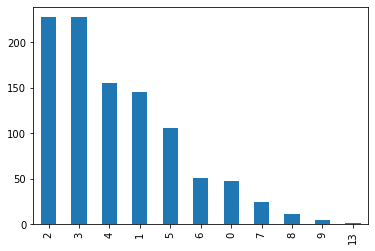

In [31]:
counts.plot(kind='bar')

(5.3.2)=
### 5.3.2 Broadcasted Mathematical Operations

Because pandas is built upon NumPy arrays, mathematical operations are propagated through Series and DataFrames. The user is able to use NumPy methods on pandas objects, and there are a number of other mathematical operations to chose from such as those listed below.

**Table 4** Broadcasted Pandas Methods

| Function | Description |
|:-------: | :---------  |
|`abs()` | Absolute value |
|`count()` | Counts items |
|`cumsum()` | Cumulative sum |
|`cumprod()` | Cumulative product |
|`mad()` | Mean absolute deviation |
|`max()` | Maximum |
|`min()` | Minimum |
|`mean()` | Mean |
|`median()` | Median |
|`mode()` | Mode |
|`std()` | Standard deviation|

```{note}
The default delta degree of freedom (`ddof`) of the `std()` function in pandas equals one unlike Microsoft Excel or NumPy ([see section 4.5](4.5)) where the default is zero. This behavior can be modified with the `ddof=1` argument.
```

(5.4)=
## 5.4 Modifying DataFrames

Now that you are able to generate DataFrames, it is useful to be able to modify them as you clean your data or perform calculations. This can be done through methods such as assignment, dropping rows and columns, and combining DataFrames or Series.

(5.4.1)=
### 5.4.1 Insert Columns via Assignment

Possibly the easiest method of adding a new column is through assignment. If a nonexistent column is called and assigned values, instead of returning an error, pandas creates a new column with the given name and populates it with the data. For example, the `elements` DataFrame below does not contain a carbon column, so the column is added when assigned to a Series with the data. 

In [32]:
elements

,H,He,Li,Be,B
name,hydrogen,helium,lithium,beryllium,boron
AN,1,2,3,4,5
mass,1.01,4.0,6.94,9.01,10.81
IE,13.6,24.6,5.4,9.3,8.3


In [33]:
elements['C'] = ['carbon', 6, 12.01, 11.3]
elements

,H,He,Li,Be,B,C
name,hydrogen,helium,lithium,beryllium,boron,carbon
AN,1,2,3,4,5,6
mass,1.01,4.0,6.94,9.01,10.81,12.01
IE,13.6,24.6,5.4,9.3,8.3,11.3


(5.4.2)=
### 5.4.2 Automatic Alignment

Another important feature of pandas is the ability to automatically align data based on labels. In the above example, carbon is added to the DataFrame with the name, atomic number, atomic mass, and ionization energy in the same order as in the DataFrame. What happens if the new data is not in the correct order? If we are using NumPy, this would require additional effort on the part of the user to reorder the data. However, if each value is labeled, pandas will see to it that they are placed in the correct location.

In [34]:
nitrogen = pd.Series([7, 14.01, 'nitrogen', 14.5], 
                     index=['AN', 'mass', 'name', 'IE'])
nitrogen

AN             7
mass       14.01
name    nitrogen
IE          14.5
dtype: object

Data for nitrogen is placed in a Series above. Notice that the values are out of order with respect to the data in `elements`. There are index labels (i.e., row labels) that tell pandas what each piece of data is, and pandas will use them to determine where to place the new information.

In [35]:
elements['N'] = nitrogen
elements

,H,He,Li,Be,B,C,N
name,hydrogen,helium,lithium,beryllium,boron,carbon,nitrogen
AN,1,2,3,4,5,6,7
mass,1.01,4.0,6.94,9.01,10.81,12.01,14.01
IE,13.6,24.6,5.4,9.3,8.3,11.3,14.5


The new column of nitrogen data has been added to `elements` with all pieces of data residing in the correct row.

(5.4.3)=
### 5.4.3 Dropping Columns

When cleaning up data, you may wish to drop a column or row. Pandas provides the `drop()` method for this purpose. It requires the name of the column or row to be dropped, and by default, it assumes a row, `axis=0`, is to be dropped. If you want to drop a column, change the axis using the `axis=1` argument. Below, the hydrogen column is dropped from the elements DataFrame.

In [36]:
elements.drop('H', axis=1)

,He,Li,Be,B,C,N
name,helium,lithium,beryllium,boron,carbon,nitrogen
AN,2,3,4,5,6,7
mass,4.0,6.94,9.01,10.81,12.01,14.01
IE,24.6,5.4,9.3,8.3,11.3,14.5


In [37]:
elements.drop('IE', axis=0)

,H,He,Li,Be,B,C,N
name,hydrogen,helium,lithium,beryllium,boron,carbon,nitrogen
AN,1,2,3,4,5,6,7
mass,1.01,4.0,6.94,9.01,10.81,12.01,14.01


In the second example above, the hydrogen is back despite being previously dropped. This is because the `drop()` method does not by default modify the origional DataFrame. To make the changes perminent, either assigned the new DataFrame to a new variable or add the `inplace=True` keyword argument to the above `drop()` function.

(5.4.4)=
### 5.4.4 Merge

To merge multiple DataFrames, pandas provides a `merge()` method. Similar to above, the `merge()` function will properly align data, but because DataFrames have multiple columns and index values to choose from, the `merge()` function can align data based on any of these values. The default behavior for `merge()` is to check for common columns between the two DataFrames and align the data based on those columns. As an example, below are two DataFrames containing data from various chemical compounds.

In [38]:
chemdata1 = [['MW', 58.08, 32.04], ['dipole', 2.91, 1.69], 
             ['formula', 'C3H6O', 'CH3OH']] 
columns=['property','acetone', 'methanol']
chmdf1 = pd.DataFrame(chemdata1, columns=columns)

In [39]:
chmdf1

,property,acetone,methanol
0,MW,58.08,32.04
1,dipole,2.91,1.69
2,formula,C3H6O,CH3OH


In [40]:
chmdata2 = [['formula', 'C6H6', 'H2O'], ['dipole', 0.00, 1.85], 
            ['MW', 78.11, 18.02]]
chmdf2 = pd.DataFrame(chmdata2 , columns=['property', 'benzene', 'water'])

In [41]:
chmdf2

,property,benzene,water
0,formula,C6H6,H2O
1,dipole,0.0,1.85
2,MW,78.11,18.02


Both DataFrames above have a `property` column, so the `merge()` function uses this common column to align all the data into a new DataFrame.

In [42]:
chmdf1.merge(chmdf2)

,property,acetone,methanol,benzene,water
0,MW,58.08,32.04,78.11,18.02
1,dipole,2.91,1.69,0.0,1.85
2,formula,C3H6O,CH3OH,C6H6,H2O


If there are multiple columns with the same name, the user can specify which to use with the `on` keyword argument (e.g., `on='property'`). Alternatively, if the two DataFrames contain columns with different names that the user wants used for alignment, the user can specify which columns to use with the `left_on` and `right_on` keyword arguments.

In [43]:
comps1 = pd.DataFrame({'element':['Co', 'Fe', 'Cr','Ni'], 
                       'protons': [27, 26, 24, 28]})
comps2 = pd.DataFrame({'metal':['Fe', 'Co', 'Cr', 'Ni'], 
                       'IE': [7.90, 7.88, 6.79, 7.64]})

In the two DataFrames generated above, each contains data on on cobalt, iron, chromium, and nickel; but the first DataFrame labels metals as `element` while the second labels the metals as `metal`. The following merges the two DataFrames based on values in these two columns.

In [44]:
comps1.merge(comps2, left_on='element',right_on='metal')

,element,protons,metal,IE
0,Co,27,Co,7.88
1,Fe,26,Fe,7.90
2,Cr,24,Cr,6.79
3,Ni,28,Ni,7.64


Notice that the values in the `element` and `metal` columns were aligned in the resulting DataFrame. To get rid of one of the redundant columns, just use the `drop()` method described in [section 5.4.3](5.4.3).

In [45]:
comps3 = comps1.merge(comps2, left_on='element', 
                      right_on='metal')
comps3.drop('metal', axis=1, inplace=True)
comps3

,element,protons,IE
0,Co,27,7.88
1,Fe,26,7.90
2,Cr,24,6.79
3,Ni,28,7.64


(5.4.5)=
### 5.4.5 Concatenation

Concatenation is the process of splicing two DataFrames along a given axis. This is different from the `merge()` method above in that `merge()` merges and aligns common data between the two DataFrames while `pd.concat()` blindly appends one DataFrame to another. As an example, imagine two lab groups measure the densities of magnesium, aluminum, titanium, and iron and load their results into DataFrames below. 

In [46]:
group1 = pd.DataFrame({'metal':['Mg', 'Al', 'Ti', 'Fe'], 
                       'density': [1.77, 2.73, 4.55, 7.88]})
group2 = pd.DataFrame({'metal':['Al', 'Mg', 'Ti', 'Fe'], 
                       'density': [2.90, 1.54, 4.12, 8.10]})

In [47]:
group1

,metal,density
0,Mg,1.77
1,Al,2.73
2,Ti,4.55
3,Fe,7.88


See what happens when these two DataFrames are concatenated.

In [48]:
pd.concat((group1, group2))

,metal,density
0,Mg,1.77
1,Al,2.73
2,Ti,4.55
3,Fe,7.88
0,Al,2.90
1,Mg,1.54
2,Ti,4.12
3,Fe,8.10


Notice how the two DataFrames are appended with no consideration for common values in the `metal` column. The default behavior is to concatenate along the first axis (`axis=0`), but this behavior can be modified with the `axis=` keyword argument. Again, the metals are not all aligned below because they were not in the same order in the original DataFrames.

In [49]:
pd.concat((group1, group2), axis=1)

,metal,density,metal,density
0,Mg,1.77,Al,2.90
1,Al,2.73,Mg,1.54
2,Ti,4.55,Ti,4.12
3,Fe,7.88,Fe,8.10


For comparison, if the two DataFrames are merged instead of concatenating them, pandas will align the data based on the `metal` as demonstrated below. Because `density` appears twice as a column header, pandas deals with this by adding a suffix to differentiate between the two data sets.

In [50]:
pd.merge(group1, group2, on='metal')

,metal,density_x,density_y
0,Mg,1.77,1.54
1,Al,2.73,2.90
2,Ti,4.55,4.12
3,Fe,7.88,8.10


## Further Reading

For further resources on the pandas library, see the following. The value of the pandas website cannot be emphasized enough as it contains a large quantity of high quality documentation and illustrative examples on using pandas for data analysis and processing.

1. Pandas Website. [http://pandas.pydata.org/](http://pandas.pydata.org/) (free resource)

2. VanderPlas, J. Python data Science Handbook: Essential Tools for Working with Data, 1st ed.; O’Reilly: Sebastopol, CA, 2017, chapter 3. A free, online version is available by the author at [https://github.com/jakevdp/PythonDataScienceHandbook](https://github.com/jakevdp/PythonDataScienceHandbook) (free resource)

3. McKinney, W. Python for Data Analysis: Data Wrangling with Pandas, NumPy, and Ipython, 2nd ed.; O’Reilly: Sebastopol, CA, 2018.

## Exercises

Complete the following exercises in a Jupyter notebook using the pandas library. Avoid using `for` loops unless absolutely necessary. Any data file(s) refered to in the problems can be found in the **data** folder in the same directory as this chapter's Jupyter notebook. 

1. Below is a table containing the melting points and boiling points of multiple common chemical solvents.

    |  Solvent  |  bp  |  mp  |
    |  :------: | :--: | :--: |
    | benzene  | 80 | 6 |
    | acetone | 56 | -95 |
    | toluene | 111 | -95 |
    | pentane |  36 | -130 |
    | ether | 35 | -116 |
    | ethanol | 78 | -114 |
    | methanol | 65 | -98 |


    
    a) Create a Series containing the boiling points of the above solvents with the solvent names as the indices. Call the Series to look up the boiling point of ethanol.
    
    b) Create a DataFrame that contains both the boiling points and melting points with the solvent names as the indices. Call the DataFrame to look up the melting point of benzene.
      
    c) Access the boiling point of pentane in the DataFrame from part b using numerical indices.
    
2. Import the attached file **blue1.csv** containing the absorption spectrum of Blue 1 food dye using pandas.

    a) Set the wavelengths as the index values.
             
    b) Plot the absorption versus wavelength.
             
    c) Determine the absorbance of Blue 1 at 620 nm.

3. Chemical Kinetics: Import the file **kinetics.csv** containing time series data for the conversion of A $\rightarrow$ Product using pandas IO tools. Generate new columns for $ln[A]$, $[A]^{-1}$, and $[A]^{0.5}$ and determine the order of the reaction.

4. Import the **ROH_data.csv** file containing data on various simple alcohols to a DataFrame. Notice that this data is missing densities for some of the compounds. 

    a) Use pandas to remove any rows with incomplete information in the density column using the `pd.dropna()`           function. Check the DataFrame to see if it has changed.

    b) Again using the `pd.dropna()` function, drop incomplete row with the parameter `inplace=True`. Check to see if the     DataFrame has changed.

5. Import the following four files containing UV-vis spectra of four food dyes with the first column listing the wavelengths (nm) and the second column containing the absorbances. Each file contains data in from 400-850 nm in 1 nm increments.

    $$ red40.csv \quad green3.csv \quad  blue1.csv \quad yellow6.csv $$

    a) Concatenation the files into a single DataFrame with the first column as the wavelength (nm) and the other         four columns as the absorbances for each dye.

    b) Replace the column headers with meaningful labels.

6. Import the two files **alcohols.csv** and **alkanes.csv** containing the boiling points of the two classes of organic compounds with respect to the number of carbons in each compound.

    a) Drop the columns containing the names of the compounds.

    b) Merge the two DataFrames allowing pandas to align the two DataFrames based on carbon number.
